# Lab 19 - k-nearest neighbors

The *k-nearest neighbors* algorithm predicts based on the values of the k closest training data.  For example, a 3-nearest neighbor algorithm will find the 3 closest data points (using the Euclidean distance) in the training data and use them to make a prediction.

If we are classifying (trying to predict qualitative value), the prediction is the class that appears the most in the k neighbors.

If we are performing regression (trying to predict a quantitative value), the prediction is the mean of the y values of the k neighbors.

## Classifier

We will return to the city services survey data from Lab 12 (Decision tree classifiers).  Recall that this data is collected by the city of [Somerville, MA](https://en.wikipedia.org/wiki/Somerville,_Massachusetts) asking residents about their happiness, as well as ratings of city services. 

The link to download the data is [https://archive.ics.uci.edu/ml/machine-learning-databases/00479/SomervilleHappinessSurvey2015.csv](https://archive.ics.uci.edu/ml/machine-learning-databases/00479/SomervilleHappinessSurvey2015.csv)

The data columns are:

- D = decision attribute (D) with values 0 (unhappy) and 1 (happy) 
- X1 = the availability of information about the city services 
- X2 = the cost of housing 
- X3 = the overall quality of public schools 
- X4 = your trust in the local police 
- X5 = the maintenance of streets and sidewalks 
- X6 = the availability of social community events 

Attributes X1 to X6 have values 1 to 5.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
from sklearn.preprocessing import MinMaxScaler
    
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import confusion_matrix

%matplotlib inline

As in Lab 12, we will read the data into the dataframe `city`, giving the columns more descriptive names in the process.

In [2]:
new_column_names = ["happy","city_info","housing_cost", "school_quality", \
                    "trust_police", "streets_sidewalks", "community_events"]
city = pd.read_csv("somerville.csv", \
                    encoding = "utf-16le",names = new_column_names, \
                    header = 0)
city.head()

,happy,city_info,housing_cost,school_quality,trust_police,streets_sidewalks,community_events
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


Define a variable `X` to contain all columns except `happy`.

In [3]:
X = city.iloc[:, [1,2,3,4,5,6]]
X.head()

,city_info,housing_cost,school_quality,trust_police,streets_sidewalks,community_events
0,3,3,3,4,2,4
1,3,2,3,5,4,3
2,5,3,3,3,3,5
3,5,4,3,3,3,5
4,5,4,3,3,3,5


<details> <summary>Answer:</summary>
<code>X = city.iloc[:,1:7]</code>
</details>

Define a variable y to be the `happy` column.

In [4]:
y = city["happy"]
y

0      0
1      0
2      1
3      0
4      0
5      1
6      0
7      1
8      0
9      0
10     0
11     0
12     1
13     0
14     0
15     1
16     0
17     1
18     0
19     0
20     1
21     1
22     0
23     0
24     1
25     1
26     0
27     1
28     1
29     1
      ..
113    1
114    0
115    1
116    0
117    0
118    1
119    0
120    1
121    0
122    0
123    1
124    1
125    0
126    0
127    0
128    0
129    0
130    0
131    0
132    1
133    1
134    1
135    1
136    0
137    1
138    0
139    1
140    1
141    0
142    0
Name: happy, Length: 143, dtype: int64

<details> <summary>Answer:</summary>
<code>y =city["happy"]</code>
</details>

Split your X and y data into training and testing data.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

<details> <summary>Answer:</summary>
<code>X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)</code>
</details>

The following code creates a 3-nearest neighbor classifier (k = 3), fits the training data to it, and makes predictions for the test data. 

In [23]:
k3nn = KNeighborsClassifier(n_neighbors = 3)
k3nn.fit(X_train, y_train)
y_pred = k3nn.predict(X_test)

Compute a confusion matrix for the true values and predictions.

In [24]:
confusion_matrix(y_test, y_pred)

array([[ 6,  8],
       [ 4, 11]], dtype=int64)

<details> <summary>Answer:</summary>
<code>confusion_matrix(y_test, y_pred, labels = [1,0])</code>
</details>

Compute the sensitivity, specificity, precision, and accuracy from the confusion matrix.

In [25]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)
precision = tp/(tp + fp)
accuracy = (tp + tn)/(tp + tn + fp + fn)

print("Sensitivity:",sensitivity)
print("Specificity:",specificity)
print("Precision:", precision)
print("Accuracy:",accuracy)

Sensitivity: 0.7333333333333333
Specificity: 0.42857142857142855
Precision: 0.5789473684210527
Accuracy: 0.5862068965517241


<details> <summary>Answer:</summary>
<code>tn, fn, fp, tp = confusion_matrix(y_test, y_pred, labels = [1,0]).ravel()

sensitivity = tp/(tp + fn)
specificity = tn/(tn + fp)
precision = tp/(tp + fp)
accuracy = (tp + tn)/(tp + tn + fp + fn)

print("Sensitivity:",sensitivity)
print("Specificity:",specificity)
print("Precision:", precision)
print("Accuracy:",accuracy)</code>
</details>

How does changing k, the number of neighbors used to make the prediction, affect the performance of this classifier?

The results from the decision tree in Lab 12 were: 

Sensitivity: 0.5584415584415584

Specificity: 0.8181818181818182

Precision: 0.7818181818181819

Accuracy: 0.6783216783216783

How does the k-nearest neighbor classifier compare to the decision tree classifier?

__The k-nearest neighbor classifier seems to be worse in every way compared to the decision tree classifier except in the case of sensitivity.__

## Regressor

To test k-nearest neighbors for regression, we will use the insurance data from Labs 7, 8, and 13.  Recall we are trying to predict the insurance cost, a quantitative value.  

If you don't have the dataset, download it from GitHub: [https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv](https://github.com/stedy/Machine-Learning-with-R-datasets/blob/master/insurance.csv)

In this data, each row represents an insurance policy and the 7 columns contain the following information about it:
- age: age of policy holder
- sex: sex of policy holder
- bmi: boday mass index (bmi) of policy holder.  bmi is a (sometimes unreliable) measurement of body fat in adults
- children: number of children (dependents) on the policy
- smoker: whether the policy holder is a smoker
- region: region of the country the policy holder lives in
- charges: price for insurance policy

Read in the insurance data, replacing the qualitative columns with dummy variables.

In [9]:
insurance = pd.read_csv("insurance.txt")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
insurance_dummies = pd.get_dummies(insurance, columns = ["sex", "smoker", "region"])
insurance_dummies.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [11]:
len(insurance_dummies.columns)

12

Create an X variable with the independent variable columns (everything except the charges column).

In [12]:
iX = insurance_dummies.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8, 9, 10, 11]]
iX.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


Create a y variable with the `charges` column.

In [13]:
iy = insurance_dummies["charges"]

Split your X and y data into training and testing data.

In [14]:
iX_train, iX_test, iy_train, iy_test = train_test_split(iX, iy, test_size = 0.2)

The following code creates a 3-nearest neighbor regressor (k = 3), fits the training data to it, and makes predictions for the test data.

In [15]:
ik3nn = KNeighborsRegressor(n_neighbors = 3)
ik3nn.fit(iX_train, iy_train)
iy_pred = ik3nn.predict(iX_test)

Compute the mean squared error for your predictions.

In [16]:
import math
mse = ((iy_test - iy_pred)**2).mean()

print("MSE: " + str(mse))
print("RMSE: " + str(math.sqrt(mse)))

MSE: 117318099.51638462
RMSE: 10831.348000890037


### Scaling data (aka normalization)

When the columns have different scales, the largest column will dominate.  We can get better results by scaling all of our columns to be between 0 and 1.  The scaling formula is:

$$x_{scaled} = \frac{x - x_{\min}}{x_{\max} - x_{\min}}$$

We can use a built in function in sci-kit learn to do the scaling:

In [17]:
scaler = MinMaxScaler(feature_range=(0, 1))

In [18]:
iX_train_scaled = scaler.fit_transform(iX_train)
iX_train_scaled

array([[0.65217391, 0.53672316, 0.2       , ..., 0.        , 0.        ,
        0.        ],
       [0.32608696, 0.61716438, 0.6       , ..., 0.        , 0.        ,
        1.        ],
       [0.2173913 , 0.35781544, 0.4       , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.93478261, 0.6031746 , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.91304348, 0.6440678 , 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.15217391, 0.26580576, 0.2       , ..., 0.        , 0.        ,
        0.        ]])

Scale your X test data.  We do not need to scale the y data.

In [19]:
iX_test_scaled = scaler.fit_transform(iX_test)
iX_test_scaled

array([[0.7173913 , 0.47774481, 0.        , ..., 0.        , 1.        ,
        0.        ],
       [0.60869565, 0.21478027, 0.6       , ..., 0.        , 0.        ,
        0.        ],
       [0.67391304, 0.38731101, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.17391304, 0.        , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.13043478, 0.46446234, 0.8       , ..., 0.        , 0.        ,
        0.        ],
       [0.82608696, 0.28274693, 0.        , ..., 0.        , 0.        ,
        1.        ]])

Built a 3-nearest neighbor regressor with the scaled training data and use it to make predictions for the scaled test data.

In [26]:
ik3nn = KNeighborsRegressor(n_neighbors = 3)
ik3nn.fit(iX_train_scaled, iy_train)
iy_pred = ik3nn.predict(iX_test_scaled)

Compute the new mean squared error.  Does scaling improve the 3-nearest neighbor regressor?

In [27]:
scaled_mse = ((iy_test - iy_pred)**2).mean()

print("MSE: " + str(mse))
print("RMSE: " + str(math.sqrt(mse)))

MSE: 48708586.03171655
RMSE: 6979.153675891981


__Scaling significantly improves the 3-neearest neighboy regressor.__

To figure out which value of k to use, we can write a loop to try all values of k between 1 and 20, and compute the mean squared error for each one.  The pseudo-code to do this is:

<code>
create an empty list
loop k from 1 to 20:
    create a k-nearest neighbor regressor
    fit the training data to the k-nearest neighbor regressor
    make predictions for the test data
    compute the mean squared error for the predictions
    store the mean squared error in the list
</code>

In [28]:
mses = []
for k in range(1,21):
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled.fit(iX_train_scaled, iy_train)
    iy_pred_scaled = iknn_scaled.predict(iX_test_scaled)
    mse = ((iy_pred_scaled - iy_test)**2).mean()
    mses.append(mse)

<details> <summary>Answer:</summary>
<code>
mses = []
for k in range(1,21):
    iknn_scaled = KNeighborsRegressor(n_neighbors = k)
    iknn_scaled.fit(iX_train_scaled, iy_train)
    iy_pred_scaled = iknn_scaled.predict(iX_test_scaled)
    mse = ((iy_pred_scaled - iy_test)**2).mean()
    mses.append(mse)
</code>
</details>

Plot the list of mean squared errors.  The lowest one will correspond to the best k.

Text(0, 0.5, 'MSE')

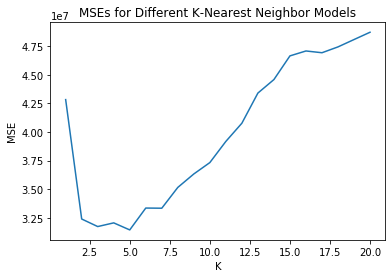

In [30]:
plt.plot(range(1,21), mses)
plt.title("MSEs for Different K-Nearest Neighbor Models")
plt.xlabel("K")
plt.ylabel("MSE")

Just as with linear regression, we can see if there is a pattern to which values are predicted correctly and which are not.  Plot a scatter plot with the true y test values on the x axis, and the predicted value - the true value on the y axis.

Text(0, 0.5, 'Residual Error')

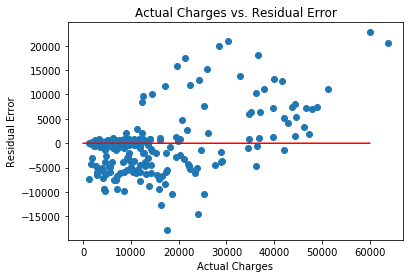

In [39]:
plt.scatter(iy_test, iy_test - iy_pred)
xx = range(0,60000)
yy = y = np.tile(0, len(xx))
plt.plot(xx, yy, color = "r")
plt.title("Actual Charges vs. Residual Error")
plt.xlabel("Actual Charges")
plt.ylabel("Residual Error")